# 1. İş Probleminin Tanımlanması:



In [33]:

import yfinance as yf
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-v0_8")

warnings.filterwarnings("ignore")

# 2. Veriyi Anlama :

In [34]:

# Savunma , bankacılık, havacyolu ve enerji sektörlerinden bazı BIST 30 hisseleri
tickers = ["ASELS.IS", "AKBNK.IS", "THYAO.IS", "TUPRS.IS"]

data = yf.download(
    tickers,
    start="2015-01-01",
    end="2025-01-01"
)
# yahodan cektıgımız verıyı  csv olarak kaydet
data.to_csv("bist_multi.csv" )
data.head(100)



[*********************100%***********************]  4 of 4 completed


Price          Close                                    High            \
Ticker      AKBNK.IS  ASELS.IS  THYAO.IS  TUPRS.IS  AKBNK.IS  ASELS.IS   
Date                                                                     
2015-01-01  5.366191  1.419959  9.407395  3.573855  5.366191  1.419959   
2015-01-02  5.384781  1.419959  9.495315  3.612631  5.397174  1.431792   
2015-01-05  5.421960  1.431792  9.964219  3.657870  5.477729  1.443625   
2015-01-06  5.452943  1.449541  9.964219  3.664333  5.452943  1.455458   
2015-01-07  5.434353  1.449541  9.817686  3.644943  5.521105  1.473207   
...              ...       ...       ...       ...       ...       ...   
2015-05-14  5.282438  1.745366  9.348782  4.220122  5.332927  1.763116   
2015-05-15  5.301372  1.739450  9.446470  4.210427  5.345550  1.751283   
2015-05-18  5.433907  1.774948  9.573464  4.275054  5.433907  1.792698   
2015-05-19  5.433907  1.774948  9.573464  4.275054  5.433907  1.774948   
2015-05-20  5.326616  1.786782  9.378088  4.446316  5.345549  1.798614   

Price                                 Low                                \
Ticker       THYAO.IS  TUPRS.IS  AKBNK.IS  ASELS.IS  THYAO.IS  TUPRS.IS   
Date                                                                      
2015-01-01   9.407395  3.573855  5.366191  1.419959  9.407395  3.573855   
2015-01-02   9.563696  3.615862  5.322816  1.408126  9.436701  3.567392   
2015-01-05   9.964219  3.690182  5.409567  1.414042  9.739536  3.657870   
2015-01-06  10.061908  3.667564  5.397174  1.414042  9.817687  3.619094   
2015-01-07  10.110752  3.670794  5.421960  1.425875  9.768842  3.632018   
...               ...       ...       ...       ...       ...       ...   
2015-05-14   9.397626  4.255666  5.238260  1.739450  9.299938  4.187808   
2015-05-15   9.534390  4.236278  5.288750  1.727617  9.397626  4.181345   
2015-05-18   9.602771  4.275054  5.345550  1.769032  9.485545  4.236278   
2015-05-19   9.573464  4.275054  5.433907  1.774948  9.573464  4.275054   
2015-05-20   9.426931  4.446316  5.288749  1.774949  9.339013  4.349376   

Price           Open                                   Volume           \
Ticker      AKBNK.IS  ASELS.IS   THYAO.IS  TUPRS.IS  AKBNK.IS ASELS.IS   
Date                                                                     
2015-01-01  5.366191  1.419959   9.407395  3.573855         0        0   
2015-01-02  5.341405  1.414042   9.446470  3.577086   6312573  3045792   
2015-01-05  5.409567  1.419959   9.739536  3.661101  12071774  8845024   
2015-01-06  5.409567  1.419959   9.915375  3.622325  13494930  7043600   
2015-01-07  5.452943  1.461374  10.013063  3.664332  17298065  4922648   
...              ...       ...        ...       ...       ...      ...   
2015-05-14  5.244571  1.745366   9.358551  4.191040  24563225  2942400   
2015-05-15  5.332928  1.745366   9.407395  4.226584  12082844  2532760   
2015-05-18  5.377106  1.774948   9.505082  4.239509  15122727  2577328   
2015-05-19  5.433907  1.774948   9.573464  4.275054         0        0   
2015-05-20  5.332927  1.798614   9.368319  4.349376  20660816  1867216   

Price                          
Ticker      THYAO.IS TUPRS.IS  
Date                           
2015-01-01         0        0  
2015-01-02   7339894  2724008  
2015-01-05  21727957  4698064  
2015-01-06   8411055  3890747  
2015-01-07   8474396  5780691  
...              ...      ...  
2015-05-14  13253969  3799607  
2015-05-15  19582266  3355688  
2015-05-18  15287539  2961196  
2015-05-19         0        0  
2015-05-20  10574386  4731874  

[100 rows x 20 columns]

In [35]:
import pandas as pd

# 1) Dosyayı header olmadan yükle
df = pd.read_csv("bist_multi.csv", header=None)

# 2) Üstteki satırları değişken olarak al
fields = df.iloc[0]      # Price, Close, Close, High, Low, Volume...
tickers = df.iloc[1]     # Ticker, AKBNK.IS, ASELS.IS...
# 3. satır Date yazdığı için bize sadece ilk kolonun tarih olduğunu söyler

# 3) Yeni kolon adlarını oluştur
new_cols = []
for i in range(df.shape[1]):
    if i == 0:  
        new_cols.append("Date")
    else:
        new_cols.append(f"{tickers[i]}_{fields[i]}")

# 4) Gerçek veriler index 3'ten başlıyor
data_clean = df.iloc[3:].reset_index(drop=True)

# 5) Kolon adlarını ata
data_clean.columns = new_cols

# 6) Date kolonunu datetime'a çevir
data_clean["Date"] = pd.to_datetime(data_clean["Date"], errors="coerce")

# 7) Diğer kolonları sayısal yap
for col in data_clean.columns[1:]:
    data_clean[col] = pd.to_numeric(data_clean[col], errors="coerce")

data_clean.head(), data_clean.columns.tolist()


(        Date  AKBNK.IS_Close  ASELS.IS_Close  THYAO.IS_Close  TUPRS.IS_Close  \
 0 2015-01-01        5.366191        1.419959        9.407395        3.573855   
 1 2015-01-02        5.384781        1.419959        9.495315        3.612631   
 2 2015-01-05        5.421960        1.431792        9.964219        3.657870   
 3 2015-01-06        5.452943        1.449541        9.964219        3.664333   
 4 2015-01-07        5.434353        1.449541        9.817686        3.644943   
 
    AKBNK.IS_High  ASELS.IS_High  THYAO.IS_High  TUPRS.IS_High  AKBNK.IS_Low  \
 0       5.366191       1.419959       9.407395       3.573855      5.366191   
 1       5.397174       1.431792       9.563696       3.615862      5.322816   
 2       5.477729       1.443625       9.964219       3.690182      5.409567   
 3       5.452943       1.455458      10.061908       3.667564      5.397174   
 4       5.521105       1.473207      10.110752       3.670794      5.421960   
 
    ...  THYAO.IS_Low  TUPRS.I

In [36]:
data_clean.columns.tolist()

['Date',
 'AKBNK.IS_Close',
 'ASELS.IS_Close',
 'THYAO.IS_Close',
 'TUPRS.IS_Close',
 'AKBNK.IS_High',
 'ASELS.IS_High',
 'THYAO.IS_High',
 'TUPRS.IS_High',
 'AKBNK.IS_Low',
 'ASELS.IS_Low',
 'THYAO.IS_Low',
 'TUPRS.IS_Low',
 'AKBNK.IS_Open',
 'ASELS.IS_Open',
 'THYAO.IS_Open',
 'TUPRS.IS_Open',
 'AKBNK.IS_Volume',
 'ASELS.IS_Volume',
 'THYAO.IS_Volume',
 'TUPRS.IS_Volume']

In [37]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2554 non-null   datetime64[ns]
 1   AKBNK.IS_Close   2554 non-null   float64       
 2   ASELS.IS_Close   2554 non-null   float64       
 3   THYAO.IS_Close   2554 non-null   float64       
 4   TUPRS.IS_Close   2554 non-null   float64       
 5   AKBNK.IS_High    2554 non-null   float64       
 6   ASELS.IS_High    2554 non-null   float64       
 7   THYAO.IS_High    2554 non-null   float64       
 8   TUPRS.IS_High    2554 non-null   float64       
 9   AKBNK.IS_Low     2554 non-null   float64       
 10  ASELS.IS_Low     2554 non-null   float64       
 11  THYAO.IS_Low     2554 non-null   float64       
 12  TUPRS.IS_Low     2554 non-null   float64       
 13  AKBNK.IS_Open    2554 non-null   float64       
 14  ASELS.IS_Open    2554 non-null   float64

In [38]:
data_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2554,2019-12-12 15:52:51.495693056,2015-01-01 00:00:00,2017-06-13 06:00:00,2019-11-25 12:00:00,2022-06-12 06:00:00,2024-12-31 00:00:00,NaN
AKBNK.IS_Close,2554.0,11.980226,3.718101,4.859591,5.66829,7.364884,68.276863,15.021335
ASELS.IS_Close,2554.0,14.191388,1.325295,4.323501,7.094655,12.032553,74.305328,17.627611
THYAO.IS_Close,2554.0,59.481663,4.522974,8.931164,13.178167,46.812288,322.371765,92.193107
TUPRS.IS_Close,2554.0,29.675384,3.253953,7.25885,9.982574,24.678081,172.407837,42.408989
AKBNK.IS_High,2554.0,12.212773,3.830358,4.92507,5.725226,7.492452,69.206134,15.356412
ASELS.IS_High,2554.0,14.464232,1.331211,4.379594,7.218187,12.309848,74.804692,17.963819
THYAO.IS_High,2554.0,60.443592,4.669506,9.009314,13.417504,47.774521,324.325535,93.587782
TUPRS.IS_High,2554.0,30.162654,3.295961,7.351469,10.121391,25.126161,172.492346,43.09843
AKBNK.IS_Low,2554.0,11.775818,3.637635,4.809333,5.609434,7.256452,66.271601,14.727421


In [39]:
data_clean.isnull().sum()


Date               0
AKBNK.IS_Close     0
ASELS.IS_Close     0
THYAO.IS_Close     0
TUPRS.IS_Close     0
AKBNK.IS_High      0
ASELS.IS_High      0
THYAO.IS_High      0
TUPRS.IS_High      0
AKBNK.IS_Low       0
ASELS.IS_Low       0
THYAO.IS_Low       0
TUPRS.IS_Low       0
AKBNK.IS_Open      0
ASELS.IS_Open      0
THYAO.IS_Open      0
TUPRS.IS_Open      0
AKBNK.IS_Volume    0
ASELS.IS_Volume    0
THYAO.IS_Volume    0
TUPRS.IS_Volume    0
dtype: int64

Text(0.5, 1.0, 'Hisselerin Kapanış Fiyatları (2015–2024)')

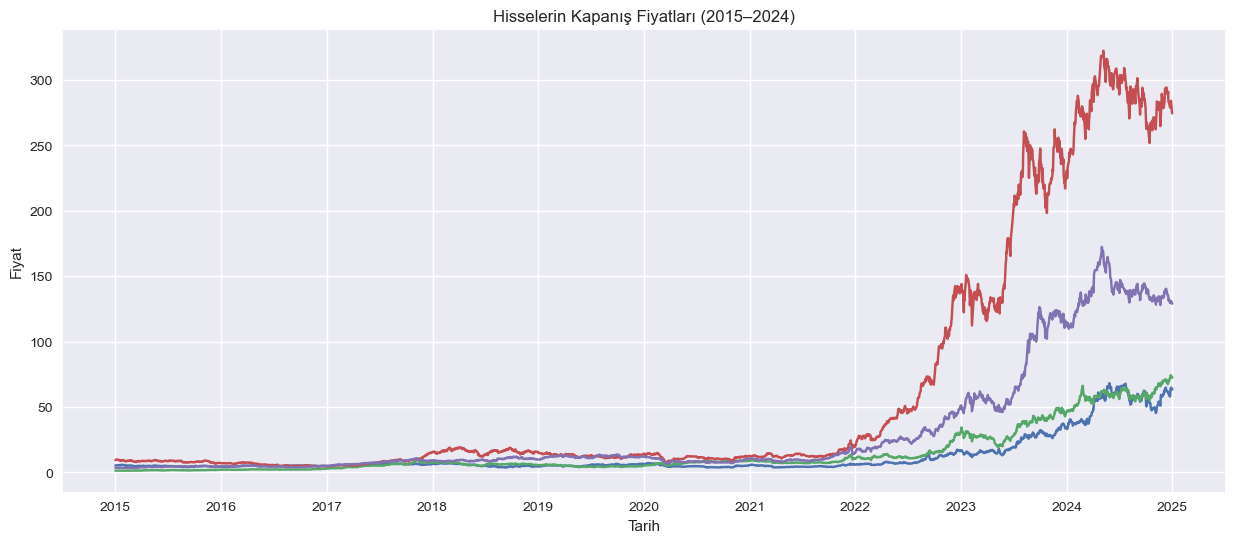

In [40]:
close_cols = [c for c in data_clean.columns if "Close" in c]

plt.figure(figsize=(15,6))
for col in close_cols:
    plt.plot(data_clean["Date"], data_clean[col], label=col)

plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.title("Hisselerin Kapanış Fiyatları (2015–2024)")


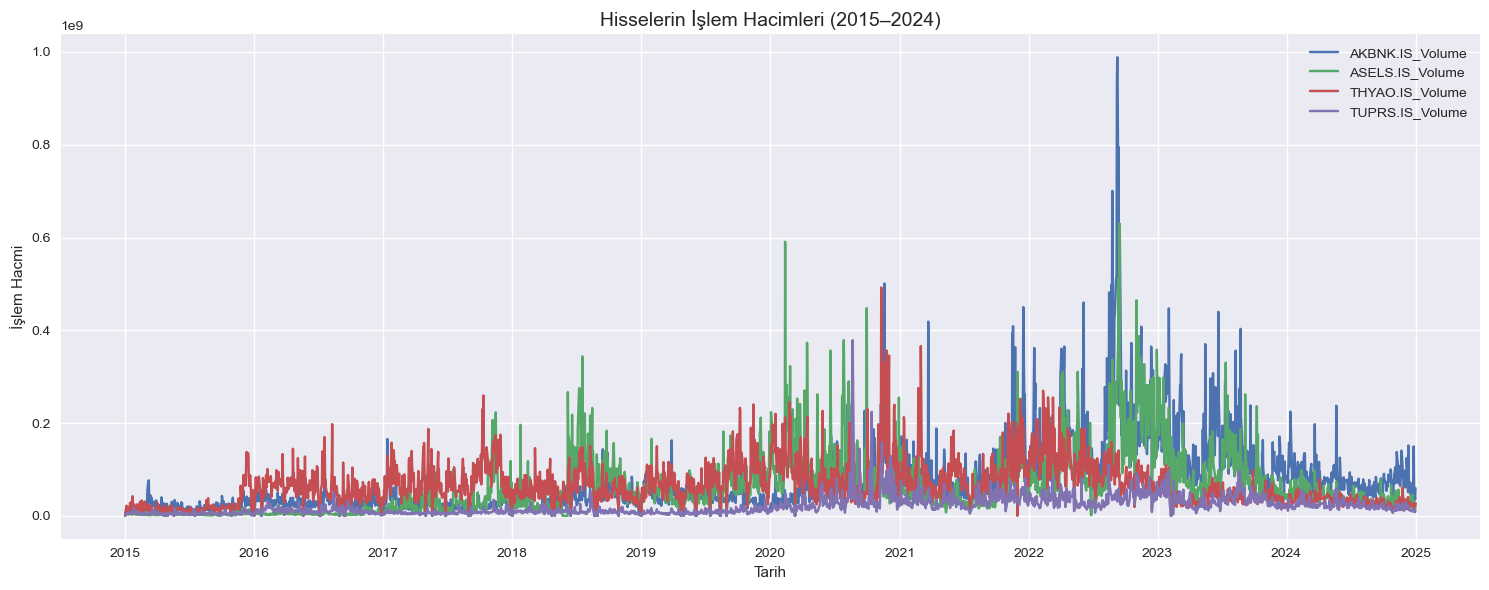

In [41]:
volume_cols = [c for c in data_clean.columns if "Volume" in c]

plt.figure(figsize=(15,6))
for col in volume_cols:
    plt.plot(data_clean["Date"], data_clean[col], label=col)

plt.title("Hisselerin İşlem Hacimleri (2015–2024)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("İşlem Hacmi")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


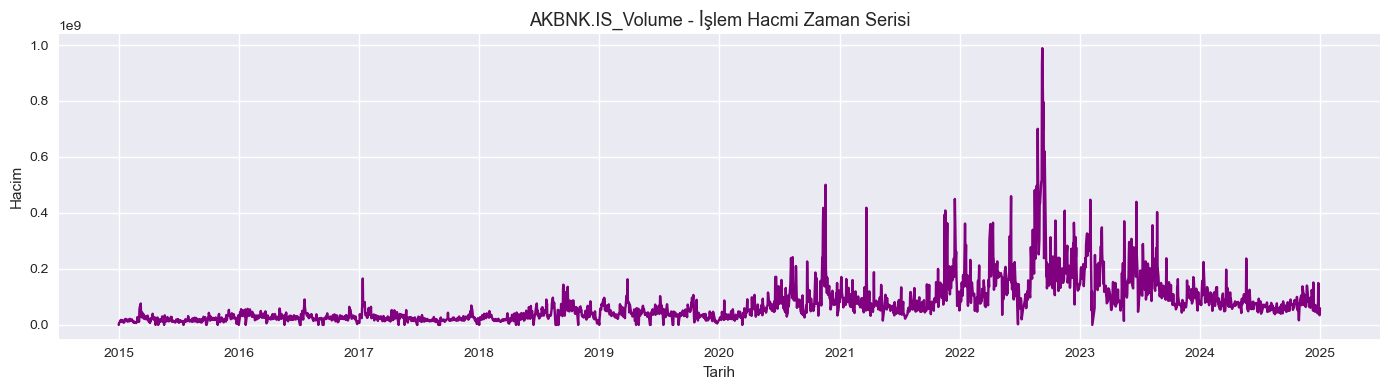

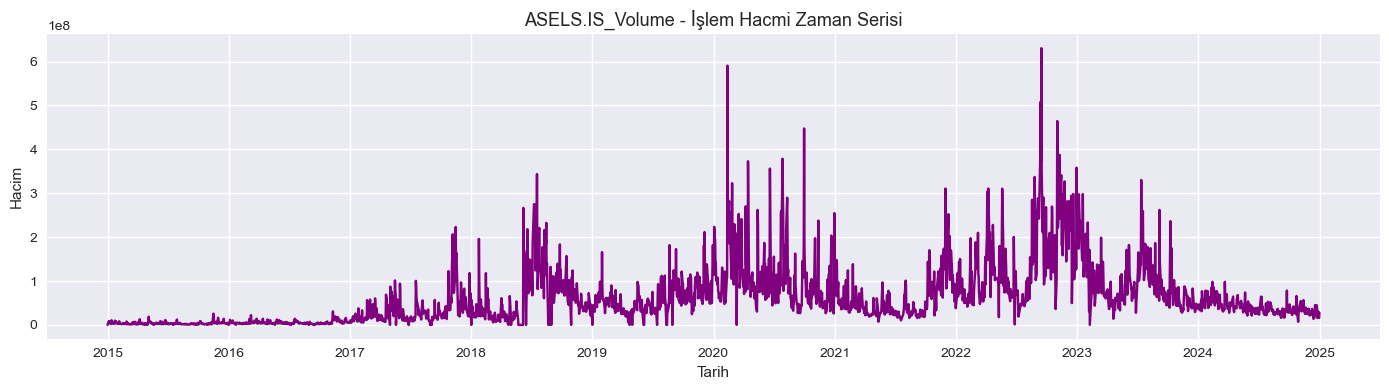

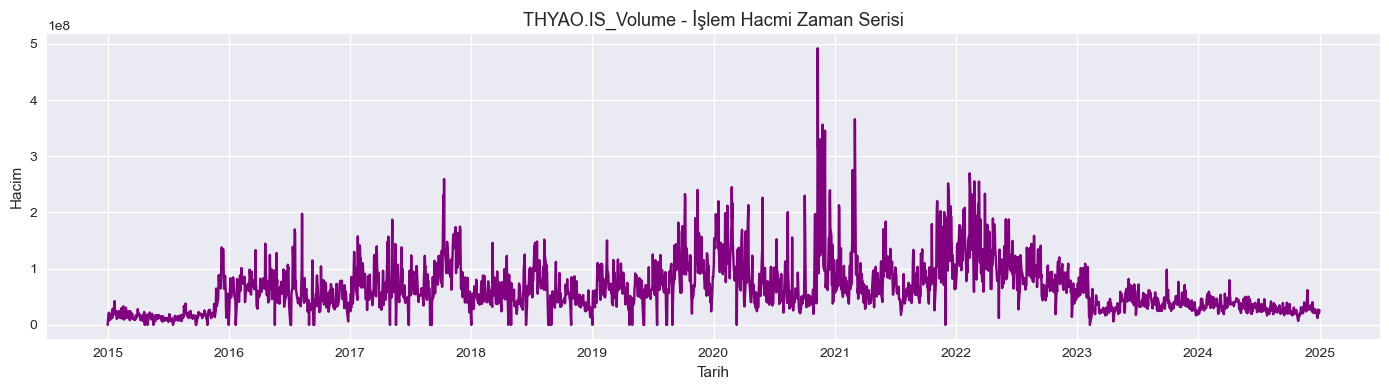

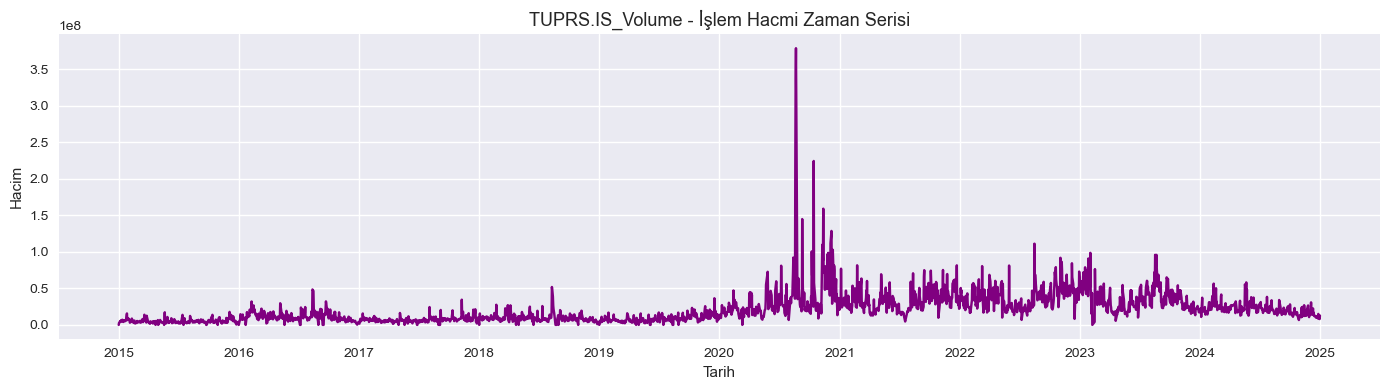

In [42]:
for col in volume_cols:
    plt.figure(figsize=(14,4))
    plt.plot(data_clean["Date"], data_clean[col], color="purple")
    plt.title(f"{col} - İşlem Hacmi Zaman Serisi", fontsize=13)
    plt.xlabel("Tarih")
    plt.ylabel("Hacim")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [43]:
print("=== HACİM İSTATİSTİKLERİ ===")
display(data_clean[volume_cols].describe().T)


=== HACİM İSTATİSTİKLERİ ===


,count,mean,std,min,25%,50%,75%,max
AKBNK.IS_Volume,2554.0,7.429330e+07,8.028113e+07,0.0,25045145.25,49785555.5,90823089.75,988525278.0
ASELS.IS_Volume,2554.0,6.157544e+07,6.742681e+07,0.0,13856413.00,42453339.0,82724726.75,630451656.0
THYAO.IS_Volume,2554.0,6.637315e+07,4.703763e+07,0.0,34002847.25,56908825.5,87237496.50,492199736.0
TUPRS.IS_Volume,2554.0,2.071054e+07,2.114367e+07,0.0,6996734.50,14847924.0,28280715.00,378512680.0


In [44]:
for col in volume_cols:
    print(f"\n===== {col} EN YÜKSEK 10 HACİM =====")
    display(data_clean[["Date", col]].nlargest(10, col))



===== AKBNK.IS_Volume EN YÜKSEK 10 HACİM =====


,Date,AKBNK.IS_Volume
1975,2022-09-09,988525278
1974,2022-09-08,932824945
1977,2022-09-13,794925474
1966,2022-08-26,700503627
1976,2022-09-12,700107192
1980,2022-09-16,619918664
1973,2022-09-07,516399862
1972,2022-09-06,512307492
1524,2020-11-19,500619230
1971,2022-09-05,499673234



===== ASELS.IS_Volume EN YÜKSEK 10 HACİM =====


,Date,ASELS.IS_Volume
1979,2022-09-15,630451656
1332,2020-02-12,590692024
1977,2022-09-13,508454116
2013,2022-11-02,464580694
1489,2020-09-30,447563012
1976,2022-09-12,393813008
2018,2022-11-09,387477764
1444,2020-07-27,378658688
1376,2020-04-14,372904224
1978,2022-09-14,372344892



===== THYAO.IS_Volume EN YÜKSEK 10 HACİM =====


,Date,THYAO.IS_Volume
1517,2020-11-10,492199736
1596,2021-03-02,365900822
1528,2020-11-25,356271129
1533,2020-12-02,345533792
1521,2020-11-16,330255564
1518,2020-11-11,314464729
1519,2020-11-12,309737637
1591,2021-02-23,275435657
1597,2021-03-03,270586148
1833,2022-02-11,269663095



===== TUPRS.IS_Volume EN YÜKSEK 10 HACİM =====


,Date,TUPRS.IS_Volume
1461,2020-08-21,378512680
1460,2020-08-20,334759516
1499,2020-10-14,224242662
1459,2020-08-19,216715660
1519,2020-11-12,158964442
1474,2020-09-09,144751103
1462,2020-08-24,133477407
1536,2020-12-07,128538438
1535,2020-12-04,111606838
1958,2022-08-16,111099205


In [45]:
# Sıfırdan temiz bir kopya
df_ret = data_clean.copy()

# Sadece Close kolonlarını bul
close_cols = [c for c in data_clean.columns if "Close" in c]

ret_cols = []

for col in close_cols:
    new_col = col + "_ret"          # örn: AKBNK.IS_Close_ret
    df_ret[new_col] = df_ret[col].pct_change()
    ret_cols.append(new_col)

print("Getiri kolonları:", ret_cols)
df_ret[["Date"] + ret_cols].head()


Getiri kolonları: ['AKBNK.IS_Close_ret', 'ASELS.IS_Close_ret', 'THYAO.IS_Close_ret', 'TUPRS.IS_Close_ret']


,Date,AKBNK.IS_Close_ret,ASELS.IS_Close_ret,THYAO.IS_Close_ret,TUPRS.IS_Close_ret
0,2015-01-01,NaN,NaN,NaN,NaN
1,2015-01-02,0.003464,0.000000,0.009346,0.010850
2,2015-01-05,0.006905,0.008333,0.049383,0.012522
3,2015-01-06,0.005714,0.012397,0.000000,0.001767
4,2015-01-07,-0.003409,0.000000,-0.014706,-0.005291


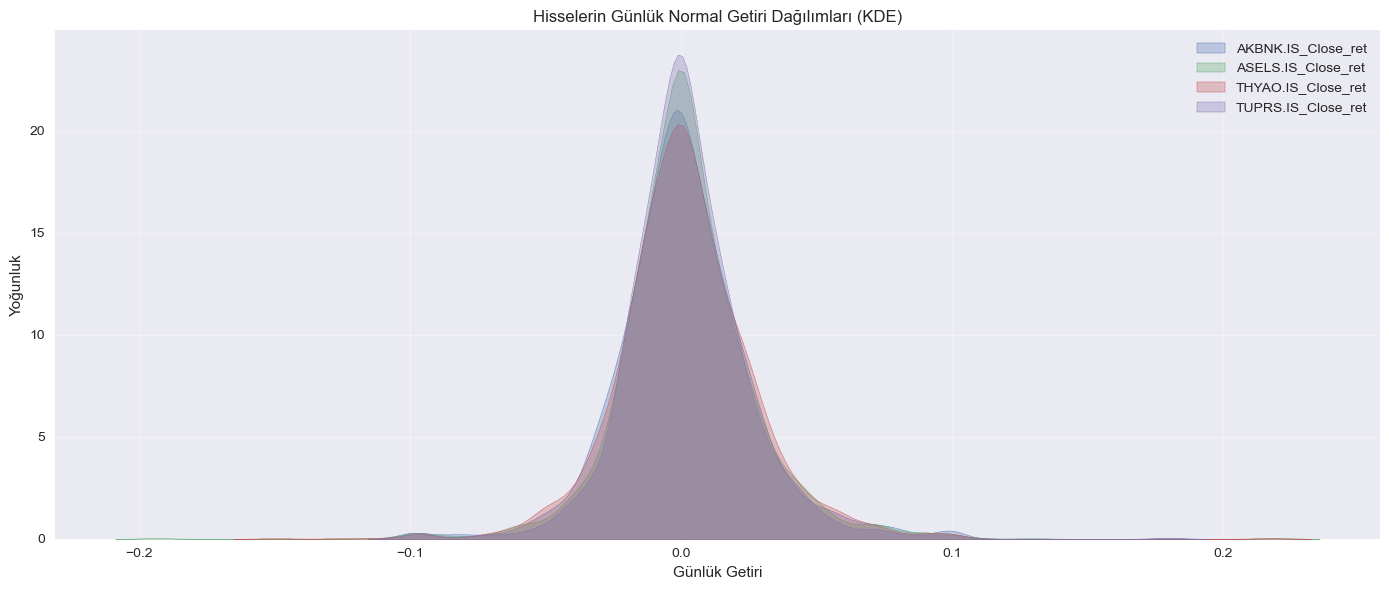

In [46]:
plt.figure(figsize=(14,6))

for col in ret_cols:
    sns.kdeplot(df_ret[col].dropna(), fill=True, alpha=0.3, label=col)

plt.title("Hisselerin Günlük Normal Getiri Dağılımları (KDE)")
plt.xlabel("Günlük Getiri")
plt.ylabel("Yoğunluk")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


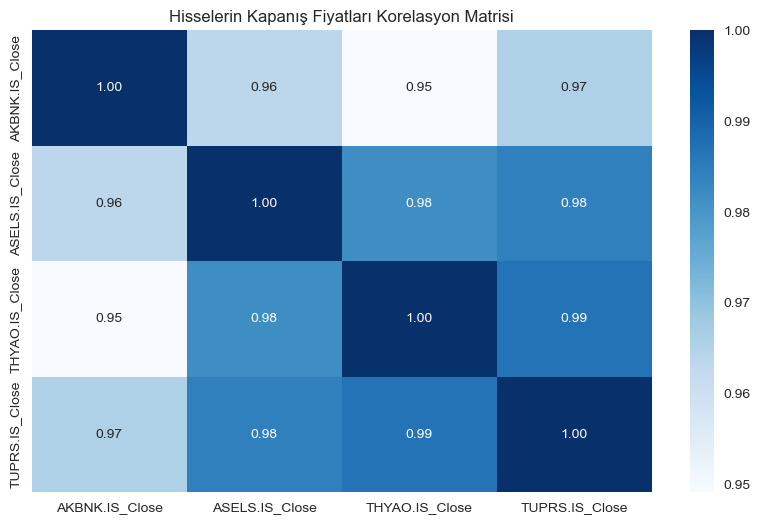

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data_clean[[c for c in data_clean.columns if "Close" in c]].corr(),
    annot=True, cmap="Blues", fmt=".2f"
)
plt.title("Hisselerin Kapanış Fiyatları Korelasyon Matrisi")
plt.show()


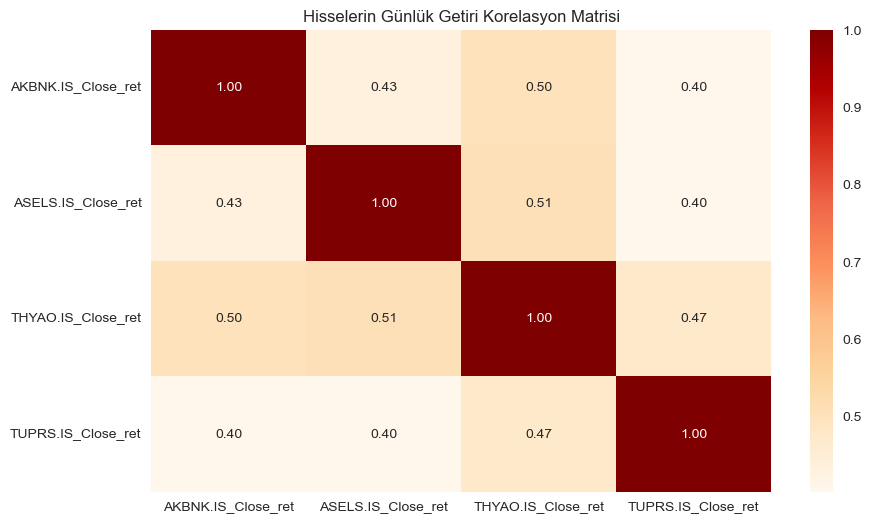

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df_ret[ret_cols].corr(),
    annot=True, cmap="OrRd", fmt=".2f"
)
plt.title("Hisselerin Günlük Getiri Korelasyon Matrisi")
plt.show()


In [49]:
volatility = df_ret[ret_cols].std() * np.sqrt(252)
volatility


AKBNK.IS_Close_ret    0.401705
ASELS.IS_Close_ret    0.395822
THYAO.IS_Close_ret    0.403693
TUPRS.IS_Close_ret    0.356100
dtype: float64

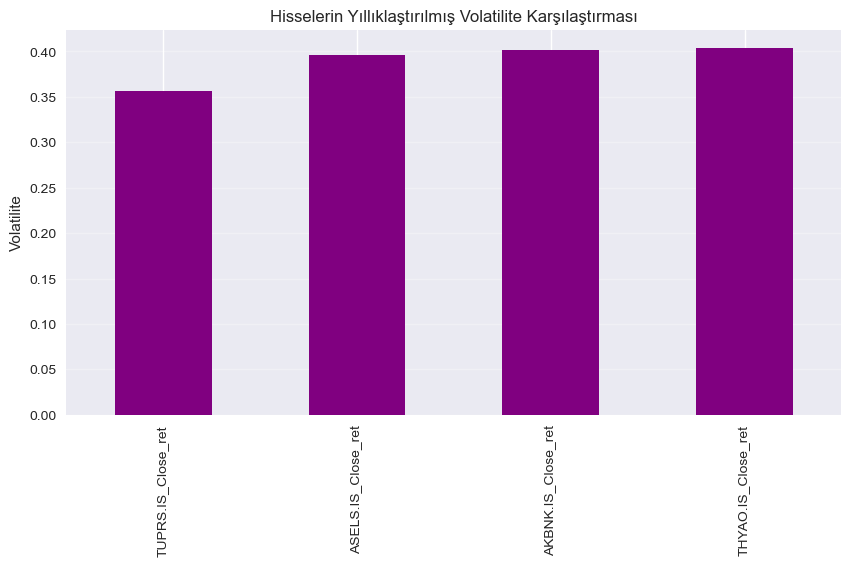

In [50]:
plt.figure(figsize=(10,5))
volatility.sort_values().plot(kind="bar", color="purple")
plt.title("Hisselerin Yıllıklaştırılmış Volatilite Karşılaştırması")
plt.ylabel("Volatilite")
plt.grid(axis="y", alpha=0.3)
plt.show()


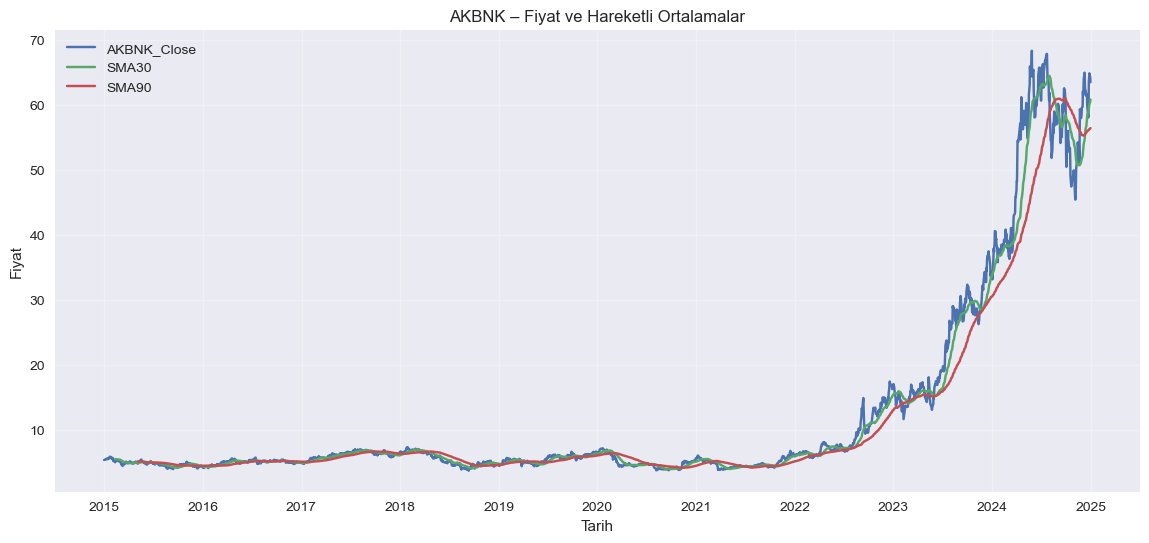

In [51]:
plt.figure(figsize=(14,6))

plt.plot(data_clean["Date"], data_clean["AKBNK.IS_Close"], label="AKBNK_Close")
plt.plot(data_clean["Date"], data_clean["AKBNK.IS_Close"].rolling(30).mean(), label="SMA30")
plt.plot(data_clean["Date"], data_clean["AKBNK.IS_Close"].rolling(90).mean(), label="SMA90")

plt.title("AKBNK – Fiyat ve Hareketli Ortalamalar")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


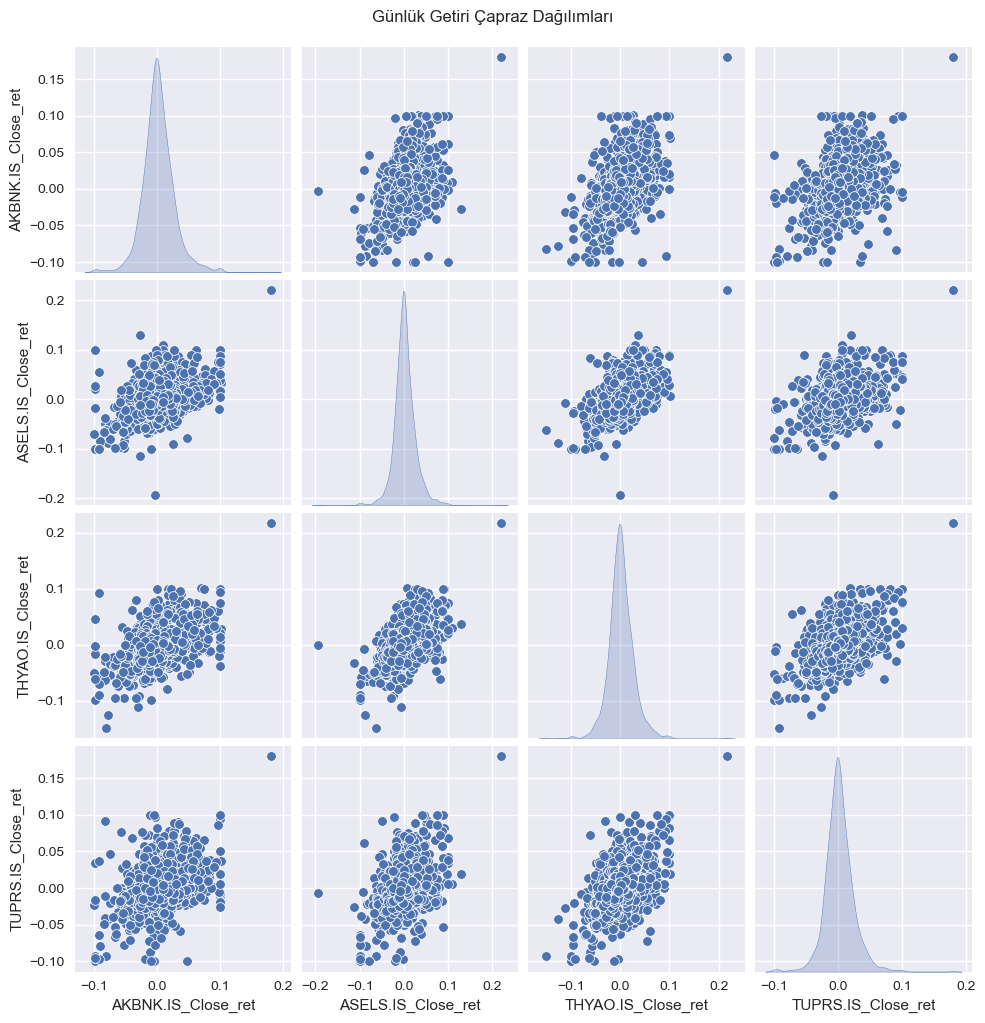

In [52]:
sns.pairplot(df_ret[ret_cols], diag_kind="kde")
plt.suptitle("Günlük Getiri Çapraz Dağılımları", y=1.02)
plt.show()


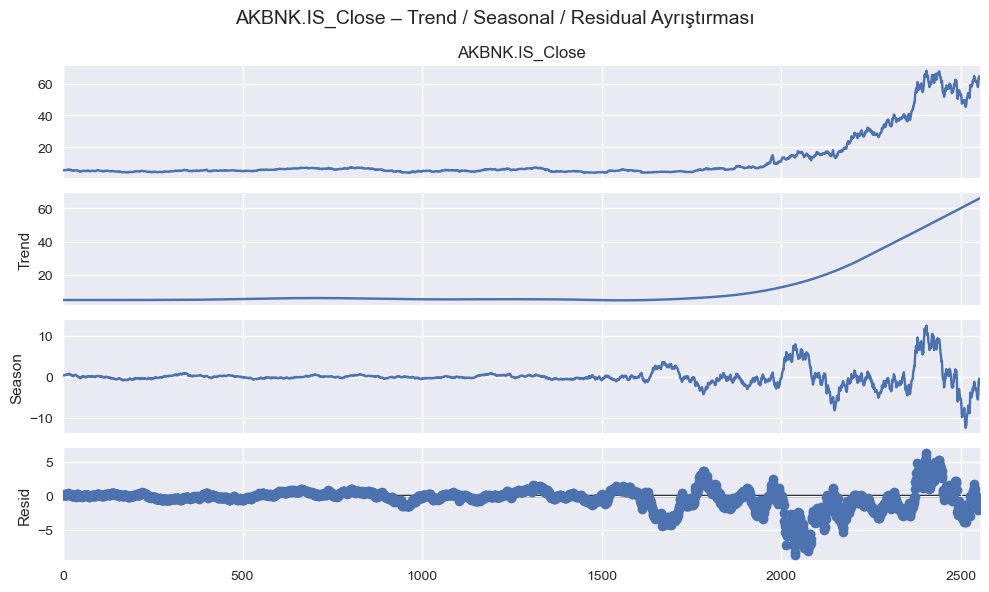

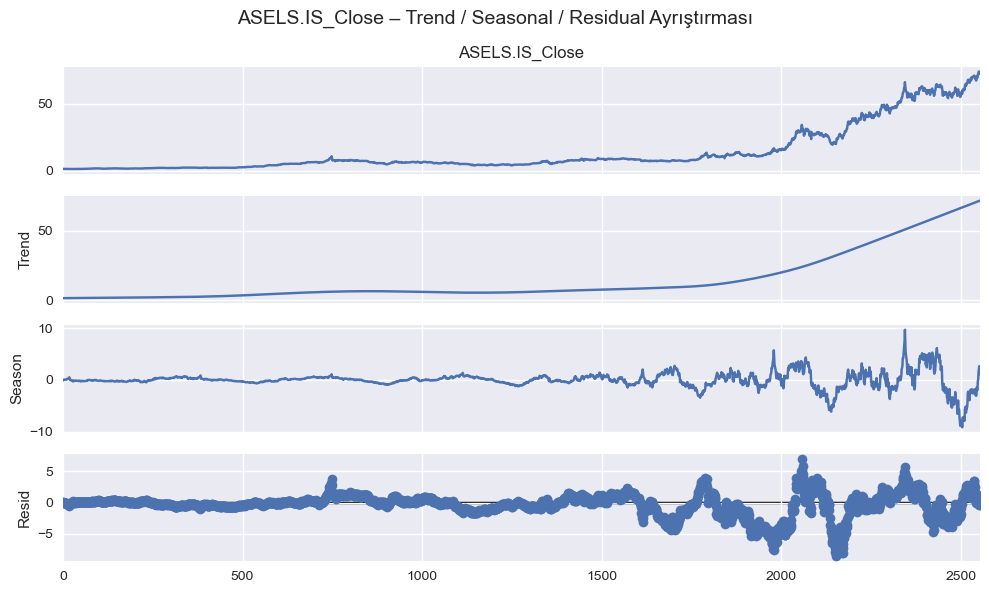

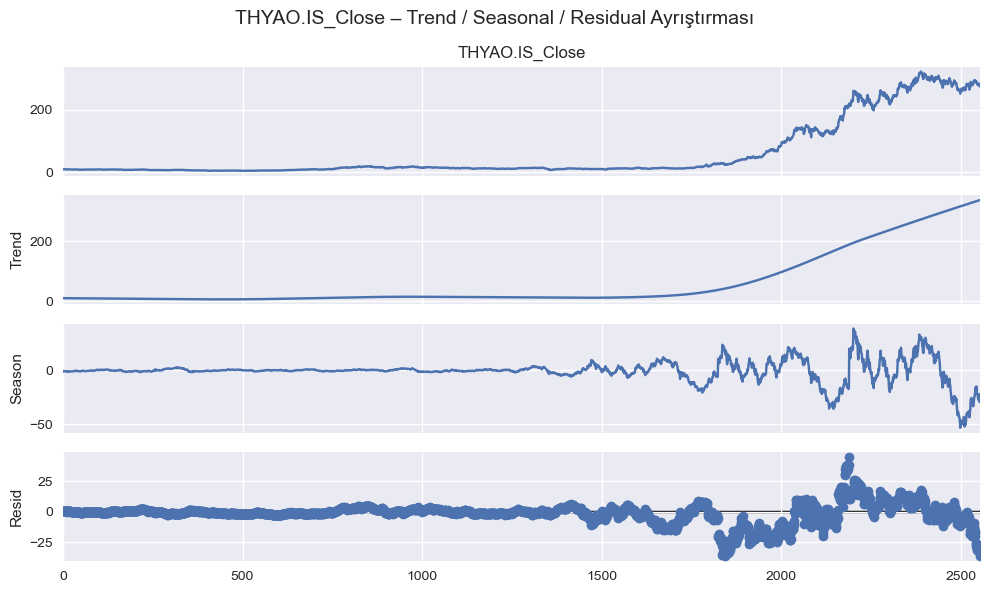

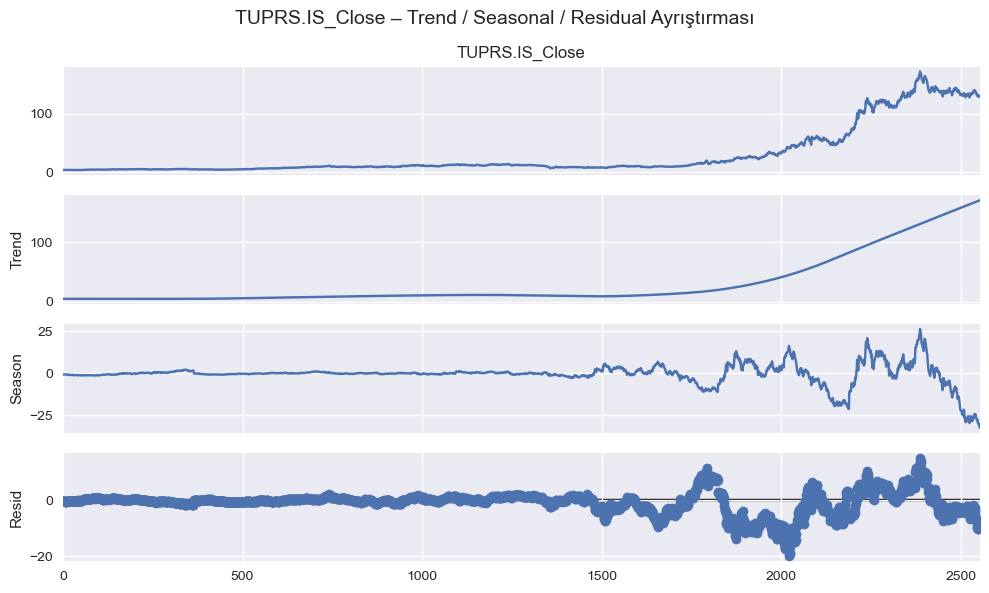

In [53]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Decomposition yapılacak kapanış fiyatları
stocks = {
    "AKBNK.IS_Close": data_clean["AKBNK.IS_Close"],
    "ASELS.IS_Close": data_clean["ASELS.IS_Close"],
    "THYAO.IS_Close": data_clean["THYAO.IS_Close"],
    "TUPRS.IS_Close": data_clean["TUPRS.IS_Close"]
}

plt.style.use("seaborn-v0_8")

for name, series in stocks.items():
    # STL decomposition
    stl = STL(series, period=365)   # yıllık mevsimsellik
    result = stl.fit()

    # Grafik
    fig = result.plot()
    fig.set_size_inches(10, 6)
    fig.suptitle(f"{name} – Trend / Seasonal / Residual Ayrıştırması", fontsize=14)
    plt.tight_layout()
    plt.show()


# 3. Veri Hazırlama:

In [54]:
# Orijinale dokunmamak için kopya
df = data_clean.copy()

# Tarihe göre sırala ve indexe al
df = df.sort_values("Date")
df.set_index("Date", inplace=True)

df.head()


,AKBNK.IS_Close,ASELS.IS_Close,THYAO.IS_Close,TUPRS.IS_Close,AKBNK.IS_High,ASELS.IS_High,THYAO.IS_High,TUPRS.IS_High,AKBNK.IS_Low,ASELS.IS_Low,THYAO.IS_Low,TUPRS.IS_Low,AKBNK.IS_Open,ASELS.IS_Open,THYAO.IS_Open,TUPRS.IS_Open,AKBNK.IS_Volume,ASELS.IS_Volume,THYAO.IS_Volume,TUPRS.IS_Volume
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,0,0,0,0
2015-01-02,5.384781,1.419959,9.495315,3.612631,5.397174,1.431792,9.563696,3.615862,5.322816,1.408126,9.436701,3.567392,5.341405,1.414042,9.446470,3.577086,6312573,3045792,7339894,2724008
2015-01-05,5.421960,1.431792,9.964219,3.657870,5.477729,1.443625,9.964219,3.690182,5.409567,1.414042,9.739536,3.657870,5.409567,1.419959,9.739536,3.661101,12071774,8845024,21727957,4698064
2015-01-06,5.452943,1.449541,9.964219,3.664333,5.452943,1.455458,10.061908,3.667564,5.397174,1.414042,9.817687,3.619094,5.409567,1.419959,9.915375,3.622325,13494930,7043600,8411055,3890747
2015-01-07,5.434353,1.449541,9.817686,3.644943,5.521105,1.473207,10.110752,3.670794,5.421960,1.425875,9.768842,3.632018,5.452943,1.461374,10.013063,3.664332,17298065,4922648,8474396,5780691


In [55]:
close_cols  = ["AKBNK.IS_Close", "ASELS.IS_Close", "THYAO.IS_Close", "TUPRS.IS_Close"]
volume_cols = ["AKBNK.IS_Volume", "ASELS.IS_Volume", "THYAO.IS_Volume", "TUPRS.IS_Volume"]
high_cols   = ["AKBNK.IS_High",  "ASELS.IS_High",  "THYAO.IS_High",  "TUPRS.IS_High"]
low_cols    = ["AKBNK.IS_Low",   "ASELS.IS_Low",   "THYAO.IS_Low",   "TUPRS.IS_Low"]
open_cols   = ["AKBNK.IS_Open",  "ASELS.IS_Open",  "THYAO.IS_Open",  "TUPRS.IS_Open"]


In [56]:
# Basit günlük getiri
for col in close_cols:
    df[f"{col}_ret"] = df[col].pct_change()

# Log-getiri (ileride volatilite/bazlı modellere lazımdır)
for col in close_cols:
    df[f"{col}_logret"] = np.log(df[col] / df[col].shift(1))


In [57]:
ROLL_WIN = 30
TRADING_DAYS = 252

for col in close_cols:
    ret_col = f"{col}_ret"
    vol_col = f"{col}_vol{ROLL_WIN}"
    df[vol_col] = (
        df[ret_col].rolling(ROLL_WIN).std() * np.sqrt(TRADING_DAYS / ROLL_WIN)
    )
df.head()

,AKBNK.IS_Close,ASELS.IS_Close,THYAO.IS_Close,TUPRS.IS_Close,AKBNK.IS_High,ASELS.IS_High,THYAO.IS_High,TUPRS.IS_High,AKBNK.IS_Low,ASELS.IS_Low,...,THYAO.IS_Close_ret,TUPRS.IS_Close_ret,AKBNK.IS_Close_logret,ASELS.IS_Close_logret,THYAO.IS_Close_logret,TUPRS.IS_Close_logret,AKBNK.IS_Close_vol30,ASELS.IS_Close_vol30,THYAO.IS_Close_vol30,TUPRS.IS_Close_vol30
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,5.384781,1.419959,9.495315,3.612631,5.397174,1.431792,9.563696,3.615862,5.322816,1.408126,...,0.009346,0.010850,0.003458,0.000000,0.009302,0.010791,NaN,NaN,NaN,NaN
2015-01-05,5.421960,1.431792,9.964219,3.657870,5.477729,1.443625,9.964219,3.690182,5.409567,1.414042,...,0.049383,0.012522,0.006881,0.008299,0.048202,0.012445,NaN,NaN,NaN,NaN
2015-01-06,5.452943,1.449541,9.964219,3.664333,5.452943,1.455458,10.061908,3.667564,5.397174,1.414042,...,0.000000,0.001767,0.005698,0.012321,0.000000,0.001765,NaN,NaN,NaN,NaN
2015-01-07,5.434353,1.449541,9.817686,3.644943,5.521105,1.473207,10.110752,3.670794,5.421960,1.425875,...,-0.014706,-0.005291,-0.003415,0.000000,-0.014815,-0.005305,NaN,NaN,NaN,NaN


In [58]:
for col in close_cols:
    df[f"{col}_SMA30"] = df[col].rolling(30).mean()
    df[f"{col}_SMA90"] = df[col].rolling(90).mean()

    # Fiyatın ortalamadan sapması (mean-reversion sinyali)
    df[f"{col}_dev_SMA30"] = df[col] - df[f"{col}_SMA30"]
    df[f"{col}_dev_SMA90"] = df[col] - df[f"{col}_SMA90"]


In [59]:
# Hacim yüzdesel değişimi & 60 günlük z-score
for col in volume_cols:
    # Günlük hacim değişimi
    df[f"{col}_pct"] = df[col].pct_change()

    rolling_mean = df[col].rolling(60).mean()
    rolling_std  = df[col].rolling(60).std()
    df[f"{col}_z60"] = (df[col] - rolling_mean) / rolling_std
df.head()


,AKBNK.IS_Close,ASELS.IS_Close,THYAO.IS_Close,TUPRS.IS_Close,AKBNK.IS_High,ASELS.IS_High,THYAO.IS_High,TUPRS.IS_High,AKBNK.IS_Low,ASELS.IS_Low,...,TUPRS.IS_Close_dev_SMA30,TUPRS.IS_Close_dev_SMA90,AKBNK.IS_Volume_pct,AKBNK.IS_Volume_z60,ASELS.IS_Volume_pct,ASELS.IS_Volume_z60,THYAO.IS_Volume_pct,THYAO.IS_Volume_z60,TUPRS.IS_Volume_pct,TUPRS.IS_Volume_z60
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,5.384781,1.419959,9.495315,3.612631,5.397174,1.431792,9.563696,3.615862,5.322816,1.408126,...,NaN,NaN,inf,NaN,inf,NaN,inf,NaN,inf,NaN
2015-01-05,5.421960,1.431792,9.964219,3.657870,5.477729,1.443625,9.964219,3.690182,5.409567,1.414042,...,NaN,NaN,0.912338,NaN,1.904014,NaN,1.960255,NaN,0.724688,NaN
2015-01-06,5.452943,1.449541,9.964219,3.664333,5.452943,1.455458,10.061908,3.667564,5.397174,1.414042,...,NaN,NaN,0.117891,NaN,-0.203665,NaN,-0.612893,NaN,-0.171840,NaN
2015-01-07,5.434353,1.449541,9.817686,3.644943,5.521105,1.473207,10.110752,3.670794,5.421960,1.425875,...,NaN,NaN,0.281820,NaN,-0.301118,NaN,0.007531,NaN,0.485754,NaN


In [60]:
for h, l, c in zip(high_cols, low_cols, close_cols):
    name = h.split("_")[0]   # 'AKBNK.IS' gibi
    df[f"{name}_intraday_range"] = (df[h] - df[l]) / df[c]


In [61]:
# aykırı değer
ret_cols = [f"{col}_ret" for col in close_cols]

for col in ret_cols:
    lower = df[col].quantile(0.005)
    upper = df[col].quantile(0.995)
    df[col] = df[col].clip(lower, upper)


In [62]:
target_ret_col = "ASELS.IS_Close_ret"

# Yarınki getiri (t+1)
df["target_next_ret_ASELS"] = df[target_ret_col].shift(-1)

# Yarın pozitif getiri mi? (0/1 sınıflandırma etiketi)
df["target_next_dir_ASELS"] = (df["target_next_ret_ASELS"] > 0).astype(int)


In [63]:
df_model = df.dropna().copy()

df_model.shape, df.shape   # karşılaştırmak için bakabilirsin


((2439, 62), (2554, 62))

In [64]:
# Hangi kolonlar kesinlikle model girdi listesinde olmayacak?
exclude_cols = close_cols + volume_cols + high_cols + low_cols + open_cols

exclude_cols += [
    "target_next_ret_ASELS",      # regresyon hedef
]

# Sınıflandırma hedefi
y_class = df_model["target_next_dir_ASELS"]

# Eğer regresyon da denemek istersen:
y_reg   = df_model["target_next_ret_ASELS"]

# Geri kalan bütün mühendislik özelliklerini X olarak al
feature_cols = [c for c in df_model.columns if c not in exclude_cols + ["target_next_dir_ASELS"]]

X = df_model[feature_cols]

X.shape, y_class.shape


((2439, 40), (2439,))

# 4. Veri Modelleme:

In [65]:
# Çalışacağımız hisseler
tickers = ["AKBNK.IS", "ASELS.IS", "THYAO.IS", "TUPRS.IS"]

dividend_list = []
split_list = []

for t in tickers:
    tk = yf.Ticker(t)
    
    # Temettüler
    div = tk.dividends.copy()
    if not div.empty:
        tmp_div = div.reset_index()
        tmp_div.columns = ["Date", "Dividend"]
        tmp_div["Ticker"] = t
        dividend_list.append(tmp_div)
    
    # Bölünme / Bedelsiz (splits)
    sp = tk.splits.copy()
    if not sp.empty:
        tmp_sp = sp.reset_index()
        tmp_sp.columns = ["Date", "SplitFactor"]
        tmp_sp["Ticker"] = t
        split_list.append(tmp_sp)

# Tek bir tabloya birleştir
dividends_df = pd.concat(dividend_list, ignore_index=True) if dividend_list else pd.DataFrame()
splits_df    = pd.concat(split_list, ignore_index=True) if split_list else pd.DataFrame()

print("Temettü tablosu:")
display(dividends_df.head())

print("Bölünme (split) tablosu:")
display(splits_df.head())


Temettü tablosu:


,Date,Dividend,Ticker
0,2004-03-30 00:00:00+03:00,70167.555000,AKBNK.IS
1,2005-03-28 00:00:00+03:00,0.087709,AKBNK.IS
2,2006-03-29 00:00:00+03:00,0.126302,AKBNK.IS
3,2007-03-30 00:00:00+03:00,0.154341,AKBNK.IS
4,2008-03-31 00:00:00+03:00,0.154341,AKBNK.IS


Bölünme (split) tablosu:


,Date,SplitFactor,Ticker
0,2001-07-06 00:00:00+03:00,1.600,AKBNK.IS
1,2002-11-11 00:00:00+02:00,1.020,AKBNK.IS
2,2003-06-23 00:00:00+03:00,1.470,AKBNK.IS
3,2004-06-07 00:00:00+03:00,1.250,AKBNK.IS
4,2005-01-03 00:00:00+02:00,0.001,AKBNK.IS


In [71]:

from IPython.display import display

plt.style.use("seaborn-v0_8")

# --- Tarih formatlarını düzelt ---
data_clean["Date"] = pd.to_datetime(data_clean["Date"])
data_clean = data_clean.sort_values("Date").reset_index(drop=True)


# --- Kapanış kolonu isimleri ---
close_cols = [
    "AKBNK.IS_Close",
    "ASELS.IS_Close",
    "THYAO.IS_Close",
    "TUPRS.IS_Close"
]

# --- Günlük log getirileri hesapla ---
for col in close_cols:
    ret_col = col + "_ret"
    data_clean[ret_col] = np.log(data_clean[col] / data_clean[col].shift(1))

display(data_clean.head())


,Date,AKBNK.IS_Close,ASELS.IS_Close,THYAO.IS_Close,TUPRS.IS_Close,AKBNK.IS_High,ASELS.IS_High,THYAO.IS_High,TUPRS.IS_High,AKBNK.IS_Low,...,THYAO.IS_Open,TUPRS.IS_Open,AKBNK.IS_Volume,ASELS.IS_Volume,THYAO.IS_Volume,TUPRS.IS_Volume,AKBNK.IS_Close_ret,ASELS.IS_Close_ret,THYAO.IS_Close_ret,TUPRS.IS_Close_ret
0,2015-01-01,5.366191,1.419959,9.407395,3.573855,5.366191,1.419959,9.407395,3.573855,5.366191,...,9.407395,3.573855,0,0,0,0,NaN,NaN,NaN,NaN
1,2015-01-02,5.384781,1.419959,9.495315,3.612631,5.397174,1.431792,9.563696,3.615862,5.322816,...,9.446470,3.577086,6312573,3045792,7339894,2724008,0.003458,0.000000,0.009302,0.010791
2,2015-01-05,5.421960,1.431792,9.964219,3.657870,5.477729,1.443625,9.964219,3.690182,5.409567,...,9.739536,3.661101,12071774,8845024,21727957,4698064,0.006881,0.008299,0.048202,0.012445
3,2015-01-06,5.452943,1.449541,9.964219,3.664333,5.452943,1.455458,10.061908,3.667564,5.397174,...,9.915375,3.622325,13494930,7043600,8411055,3890747,0.005698,0.012321,0.000000,0.001765
4,2015-01-07,5.434353,1.449541,9.817686,3.644943,5.521105,1.473207,10.110752,3.670794,5.421960,...,10.013063,3.664332,17298065,4922648,8474396,5780691,-0.003415,0.000000,-0.014815,-0.005305


In [72]:
# Event tarihlerini timezone bilgisinden arındır
events["Date"] = pd.to_datetime(events["Date"]).dt.tz_localize(None)

# Sonra tarih aralığı filtresini uygula
min_date = data_clean["Date"].min()
max_date = data_clean["Date"].max()

events = events[(events["Date"] >= min_date) & (events["Date"] <= max_date)].reset_index(drop=True)

print("2015–2025 arası filtrelenmiş event tablosu:")
display(events.sort_values(["Ticker","Date"]).head(50))


2015–2025 arası filtrelenmiş event tablosu:


,Date,Dividend,Ticker,EventType,SplitFactor
0,2015-03-30,0.122100,AKBNK.IS,Dividend,NaN
1,2016-03-30,0.128617,AKBNK.IS,Dividend,NaN
2,2017-03-30,0.192925,AKBNK.IS,Dividend,NaN
3,2018-03-28,0.342978,AKBNK.IS,Dividend,NaN
4,2021-03-26,0.120400,AKBNK.IS,Dividend,NaN
5,2022-03-30,0.233000,AKBNK.IS,Dividend,NaN
6,2023-03-30,1.730000,AKBNK.IS,Dividend,NaN
7,2024-03-26,1.917500,AKBNK.IS,Dividend,NaN
8,2015-05-29,0.016250,ASELS.IS,Dividend,NaN
36,2016-05-25,NaN,ASELS.IS,Split,2.0


In [73]:
# Veri setinin kapsadığı tarih aralığı
min_date = data_clean["Date"].min()
max_date = data_clean["Date"].max()

print("Price data date range:", min_date, "→", max_date)

# Events tablosunu bu aralığa göre filtreleyelim
events_filtered = events[(events["Date"] >= min_date) & (events["Date"] <= max_date)].reset_index(drop=True)

print("2015–2025 arası filtrelenmiş event tablosu:")
display(events_filtered.head())
print("Toplam event sayısı:", len(events_filtered))


Price data date range: 2015-01-01 00:00:00 → 2024-12-31 00:00:00
2015–2025 arası filtrelenmiş event tablosu:


,Date,Dividend,Ticker,EventType,SplitFactor
0,2015-03-30,0.122100,AKBNK.IS,Dividend,NaN
1,2016-03-30,0.128617,AKBNK.IS,Dividend,NaN
2,2017-03-30,0.192925,AKBNK.IS,Dividend,NaN
3,2018-03-28,0.342978,AKBNK.IS,Dividend,NaN
4,2021-03-26,0.120400,AKBNK.IS,Dividend,NaN


Toplam event sayısı: 40


In [74]:
def run_event_study(data, events_df, close_columns,
                    window_pre=10, window_post=10):
    """
    data        : data_clean (Date + fiyat + getiri kolonları)
    events_df   : events_filtered (Date, Ticker, EventType, Dividend, SplitFactor)
    close_columns : ['AKBNK.IS_Close', ...]
    window_pre  : event öncesi gün sayısı
    window_post : event sonrası gün sayısı
    """

    # Fiyat + getiri dataframe'ini Date index olacak şekilde hazırlayalım
    data_idx = data.set_index("Date")
    
    all_event_windows = []   # her event için AR/CAR saklayacağımız liste
    
    for i, row in events_df.iterrows():
        ticker = row["Ticker"]          # örn: 'AKBNK.IS'
        event_date = row["Date"]
        event_type = row["EventType"]   # Dividend / Split
        dividend = row.get("Dividend", np.nan)
        split_factor = row.get("SplitFactor", np.nan)
        
        # İlgili hissenin kapanış ve getiri kolonlarının isimleri
        close_col = f"{ticker}_Close"
        ret_col   = f"{ticker}_Close_ret"

        # Bu ticker bizim price datasında var mı?
        if close_col not in data_idx.columns or ret_col not in data_idx.columns:
            print(f"Uyarı: {ticker} için kolon bulunamadı, event atlandı.")
            continue
        
        stock = data_idx[[close_col, ret_col]].dropna().copy()
        
        # Event tarihi tam işlem günü olmayabilir -> en yakın iş günü
        if event_date in stock.index:
            ed = event_date
        else:
            # En yakın indexi bul (üst/alt fark etmez, en yakın tarih)
            ed = stock.index[stock.index.get_loc(event_date, method="nearest")]
        
        # Event gününün integer indexi
        ed_loc = stock.index.get_loc(ed)
        
        # Pencere sınırları
        start_loc = max(ed_loc - window_pre, 0)
        end_loc   = min(ed_loc + window_post, len(stock) - 1)
        
        window_df = stock.iloc[start_loc:end_loc+1].copy()
        
        # Göreli gün indeksleri (event günü = 0)
        rel_days = np.arange(start_loc - ed_loc, end_loc - ed_loc + 1)
        window_df["rel_day"] = rel_days
        
        # Normal getiri modeli: ilgili hissenin genel ortalama günlük getirisi
        # İstersen sadece pencere dışı dönem ortalaması da alabiliriz.
        mu = stock[ret_col].mean()
        
        # Anormal getiri (AR) ve kümülatif anormal getiri (CAR)
        window_df["AR"]  = window_df[ret_col] - mu
        window_df["CAR"] = window_df["AR"].cumsum()
        
        # Event bilgilerini ekleyelim
        window_df["Ticker"]      = ticker
        window_df["EventType"]   = event_type
        window_df["Dividend"]    = dividend
        window_df["SplitFactor"] = split_factor
        window_df["EventDate"]   = ed
        
        all_event_windows.append(window_df.reset_index().rename(columns={"index": "Date"}))
    
    if not all_event_windows:
        return None
    
    events_panel = pd.concat(all_event_windows, ignore_index=True)
    return events_panel


# Fonksiyonu çalıştıralım
event_window_df = run_event_study(
    data=data_clean,
    events_df=events_filtered,
    close_columns=close_cols,
    window_pre=10,
    window_post=10
)

print("Event window DataFrame (ilk 10 gözlem):")
display(event_window_df.head(10))
print("Toplam satır:", len(event_window_df))


Event window DataFrame (ilk 10 gözlem):


,Date,AKBNK.IS_Close,AKBNK.IS_Close_ret,rel_day,AR,CAR,Ticker,EventType,Dividend,SplitFactor,EventDate,ASELS.IS_Close,ASELS.IS_Close_ret,TUPRS.IS_Close,TUPRS.IS_Close_ret
0,2015-03-16,4.715556,0.026633,-10,0.025665,0.025665,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
1,2015-03-17,4.814701,0.020807,-9,0.019840,0.045505,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
2,2015-03-18,4.752735,-0.012954,-8,-0.013921,0.031584,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
3,2015-03-19,4.994401,0.049597,-7,0.048630,0.080213,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
4,2015-03-20,5.050169,0.011104,-6,0.010137,0.090350,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
5,2015-03-23,5.112133,0.012195,-5,0.011227,0.101578,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
6,2015-03-24,4.938631,-0.034529,-4,-0.035496,0.066082,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
7,2015-03-25,4.963417,0.005006,-3,0.004039,0.070121,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
8,2015-03-26,4.920041,-0.008778,-2,-0.009745,0.060376,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN
9,2015-03-27,4.858076,-0.012674,-1,-0.013642,0.046734,AKBNK.IS,Dividend,0.1221,NaN,2015-03-30,NaN,NaN,NaN,NaN


Toplam satır: 840


In [75]:
# Her hisse + her relatif gün için ortalama AR & CAR
aar_caar_by_ticker = (
    event_window_df
    .groupby(["Ticker", "rel_day"])
    .agg(
        AAR=("AR", "mean"),
        CAAR=("CAR", "mean"),
        N_events=("EventDate", "nunique")
    )
    .reset_index()
)

print("Ticker bazında AAR/CAAR tablosu (ilk satırlar):")
display(aar_caar_by_ticker.head(20))

# Event tipine göre de bakabiliriz (temettü vs split)
aar_caar_by_type = (
    event_window_df
    .groupby(["EventType", "rel_day"])
    .agg(
        AAR=("AR", "mean"),
        CAAR=("CAR", "mean"),
        N_events=("EventDate", "nunique")
    )
    .reset_index()
)

print("EventType bazında AAR/CAAR tablosu:")
display(aar_caar_by_type.head(20))


Ticker bazında AAR/CAAR tablosu (ilk satırlar):


,Ticker,rel_day,AAR,CAAR,N_events
0,AKBNK.IS,-10,0.007280,0.007280,8
1,AKBNK.IS,-9,-0.003461,0.003819,8
2,AKBNK.IS,-8,-0.004557,-0.000738,8
3,AKBNK.IS,-7,-0.006713,-0.007451,8
4,AKBNK.IS,-6,0.004899,-0.002552,8
5,AKBNK.IS,-5,0.005972,0.003420,8
6,AKBNK.IS,-4,-0.017581,-0.014161,8
7,AKBNK.IS,-3,-0.010767,-0.024929,8
8,AKBNK.IS,-2,-0.003805,-0.028733,8
9,AKBNK.IS,-1,0.002088,-0.026645,8


EventType bazında AAR/CAAR tablosu:


,EventType,rel_day,AAR,CAAR,N_events
0,Dividend,-10,0.007518,0.007518,36
1,Dividend,-9,-0.002368,0.005150,36
2,Dividend,-8,-0.002490,0.002660,36
3,Dividend,-7,-0.003112,-0.000452,36
4,Dividend,-6,0.001637,0.001186,36
5,Dividend,-5,0.003610,0.004796,36
6,Dividend,-4,0.000554,0.005350,36
7,Dividend,-3,-0.002436,0.002914,36
8,Dividend,-2,0.002865,0.005779,36
9,Dividend,-1,-0.006068,-0.000289,36


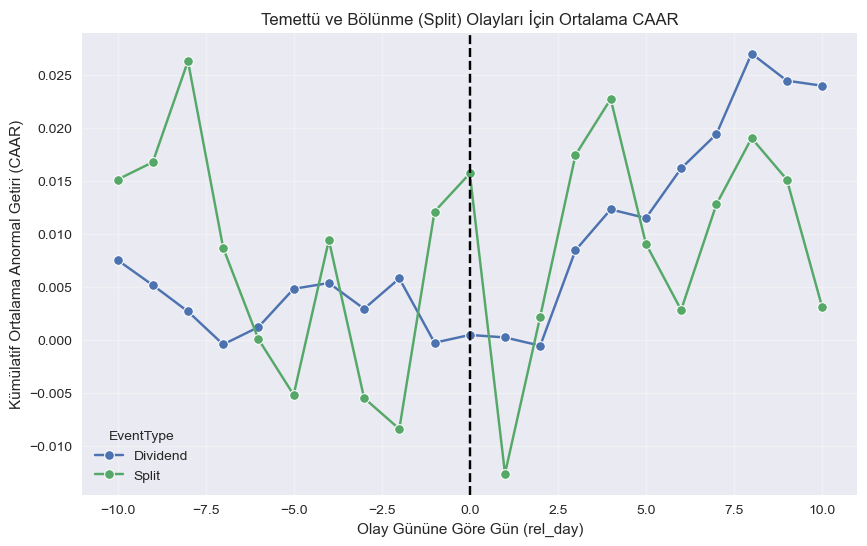

In [76]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=aar_caar_by_type,
    x="rel_day", y="CAAR", hue="EventType", marker="o"
)
plt.axvline(0, color="black", linestyle="--", label="Event Günü")
plt.title("Temettü ve Bölünme (Split) Olayları İçin Ortalama CAAR")
plt.xlabel("Olay Gününe Göre Gün (rel_day)")
plt.ylabel("Kümülatif Ortalama Anormal Getiri (CAAR)")
plt.grid(True, alpha=0.3)
plt.show()


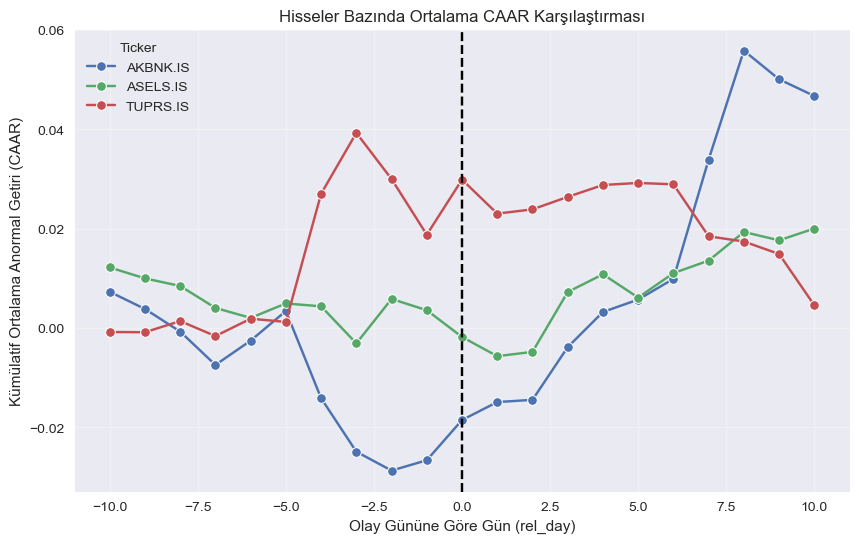

In [77]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=aar_caar_by_ticker,
    x="rel_day", y="CAAR", hue="Ticker", marker="o"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Hisseler Bazında Ortalama CAAR Karşılaştırması")
plt.xlabel("Olay Gününe Göre Gün (rel_day)")
plt.ylabel("Kümülatif Ortalama Anormal Getiri (CAAR)")
plt.grid(True, alpha=0.3)
plt.show()


# 5. Değerlendirme :

In [81]:
from scipy.stats import ttest_1samp
ttest_results = []

for (etype, rel_day), grp in event_window_df.groupby(["EventType", "rel_day"]):
    ar_vals = grp["AR"].dropna().values
    if len(ar_vals) < 3:
        # Çok az gözlem varsa test yapmaya gerek yok
        continue
    t_stat, p_val = ttest_1samp(ar_vals, 0.0)  # H0: AR ortalaması = 0
    ttest_results.append({
        "EventType": etype,
        "RelDay": rel_day,
        "N_events": len(ar_vals),
        "t_stat": t_stat,
        "p_value": p_val
    })

ttest_df = pd.DataFrame(ttest_results)

print("\nAAR için t-testi sonuçları (EventType × RelDay):")
display(ttest_df.head(20))


AAR için t-testi sonuçları (EventType × RelDay):


,EventType,RelDay,N_events,t_stat,p_value
0,Dividend,-10,36,1.869747,0.069903
1,Dividend,-9,36,-0.735333,0.467036
2,Dividend,-8,36,-0.678338,0.502018
3,Dividend,-7,36,-1.072533,0.290821
4,Dividend,-6,36,0.525382,0.602631
5,Dividend,-5,36,1.141721,0.261321
6,Dividend,-4,36,0.109951,0.913076
7,Dividend,-3,36,-0.574679,0.569184
8,Dividend,-2,36,0.851339,0.400369
9,Dividend,-1,36,-1.505067,0.141279


In [82]:
# p < 0.05 anlamlı olan günleri görelim
signif_days = ttest_df[ttest_df["p_value"] < 0.05].sort_values(["EventType", "RelDay"])

print("\nİstatistiksel olarak anlamlı (p < 0.05) AAR değerine sahip günler:")
display(signif_days)


İstatistiksel olarak anlamlı (p < 0.05) AAR değerine sahip günler:


,EventType,RelDay,N_events,t_stat,p_value
13,Dividend,3,36,2.345213,0.024814
37,Split,6,4,-3.597555,0.036826


In [83]:
# Ticker bazında CAAR pivot
caar_pivot_ticker = (
    aar_caar_by_ticker
    .pivot_table(index="Ticker", columns="rel_day", values="CAAR")
)

gunler = [0, 1, 5, 10]
gunler_mevcut = [g for g in gunler if g in caar_pivot_ticker.columns]

caar_summary_ticker = caar_pivot_ticker[gunler_mevcut]
caar_summary_ticker.columns = [f"CAAR_{g}" for g in gunler_mevcut]

print("\nTicker bazında seçili günlerde CAAR özet tablosu (0, +1, +5, +10):")
display(caar_summary_ticker.round(4))

# EventType bazında CAAR pivot
caar_pivot_type = (
    aar_caar_by_type
    .pivot_table(index="EventType", columns="rel_day", values="CAAR")
)

gunler_mevcut_type = [g for g in gunler if g in caar_pivot_type.columns]
caar_summary_type = caar_pivot_type[gunler_mevcut_type]
caar_summary_type.columns = [f"CAAR_{g}" for g in gunler_mevcut_type]

print("\nEventType (Dividend / Split) bazında seçili günlerde CAAR özet tablosu:")
display(caar_summary_type.round(4))


Ticker bazında seçili günlerde CAAR özet tablosu (0, +1, +5, +10):


,CAAR_0,CAAR_1,CAAR_5,CAAR_10
Ticker,,,,
AKBNK.IS,-0.0185,-0.0149,0.0057,0.0467
ASELS.IS,-0.0018,-0.0057,0.0061,0.0200
TUPRS.IS,0.0299,0.0230,0.0292,0.0046



EventType (Dividend / Split) bazında seçili günlerde CAAR özet tablosu:


,CAAR_0,CAAR_1,CAAR_5,CAAR_10
EventType,,,,
Dividend,0.0004,0.0002,0.0115,0.0240
Split,0.0157,-0.0126,0.0091,0.0031


# 6. Dağıtma :

app.py dosyada bu madde tamamlanmıştır.